In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, confusion_matrix, roc_curve, roc_auc_score,recall_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\data_wo_cluster.csv")
data = data.sample(frac=1).reset_index(drop=True)

# Separate features and target variable
X = data.drop(columns=['CLASS'])
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the training data
preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Define the DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)
X_train_encoded_dense = X_train_encoded.toarray()

# Train the model
history = model.fit(X_train_encoded_dense, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test_encoded.toarray(), y_test), callbacks=[early_stopping])

model.save_weights('DNN_trained.weights.h5')

best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

best_epoch = history.history['val_accuracy'].index(best_val_accuracy) + 1
print("Epoch with Best Validation Accuracy:", best_epoch)


y_test_pred_prob = model.predict(X_test_encoded.toarray())
y_test_pred = (y_test_pred_prob > 0.5).astype(int)



accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
logloss = log_loss(y_test, y_test_pred_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Log Loss:", logloss)
print("Recall", recall)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TNR = TN / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)

Epoch 1/100


C:\Users\beher\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6196 - loss: 0.6562 - val_accuracy: 0.7275 - val_loss: 0.5707
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6925 - loss: 0.5866 - val_accuracy: 0.7457 - val_loss: 0.5478
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7206 - loss: 0.5560 - val_accuracy: 0.7477 - val_loss: 0.5378
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7492 - loss: 0.5243 - val_accuracy: 0.7417 - val_loss: 0.5349
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 0.5122 - val_accuracy: 0.7548 - val_loss: 0.5287
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7589 - loss: 0.5218 - val_accuracy: 0.7578 - val_loss: 0.5256
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7561 - loss: 0.4909 - val_accuracy: 0.7528 - val_loss: 0.5257
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7647 - loss: 0.4950 - val_accuracy: 0.7548 - val_loss: 0.5

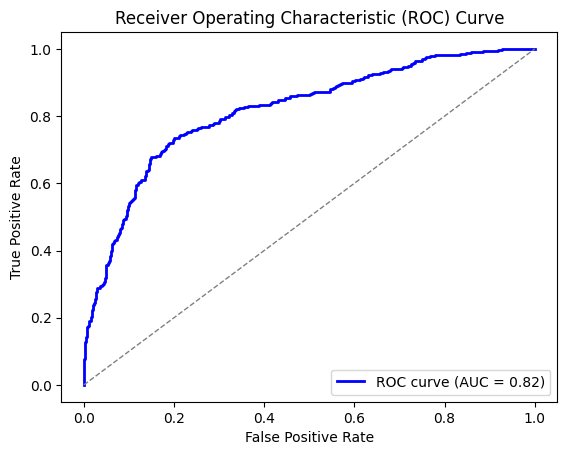

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[384  96]
 [139 372]]


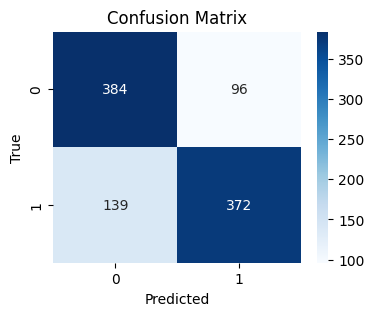

In [8]:
import seaborn as sns
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))  # Adjust the figsize as needed
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\NEW_TESTING.csv")
X_new_encoded = preprocessor.transform(new_data)
y_pred_prob_new = model.predict(X_new_encoded.toarray())  # Convert to dense array for prediction

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('dnn_70_predictions_with_probabilities.csv', index=False)

24384/24384 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step


In [9]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\NEW_TESTING.csv")
X_new_encoded = preprocessor.transform(new_data)
y_pred_prob_new = model.predict(X_new_encoded.toarray())  # Convert to dense array for prediction

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('dnn_NEWSH_70_predictions_with_probabilities.csv', index=False)

24384/24384 ━━━━━━━━━━━━━━━━━━━━ 24s 978us/step


In [10]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\ls_merge_data.csv")
X_new_encoded = preprocessor.transform(new_data)
y_pred_prob_new = model.predict(X_new_encoded.toarray())  # Convert to dense array for prediction

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('dnn_NEWSHING_70_predictions_with_probabilities.csv', index=False)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
